In [1]:
import pandas as pd

DATA = '/kaggle/input/adobe-stock-data-1986-2024/Adobe_Data.csv'
df = pd.read_csv(filepath_or_buffer=DATA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df.head()

,Date,Adj_Close,Close,High,Low,Open,Volume,year
0,1986-08-13,0.198057,0.210938,0.218750,0.210938,0.0,18899200,1986
1,1986-08-14,0.209060,0.222656,0.230469,0.222656,0.0,4160000,1986
2,1986-08-15,0.205392,0.218750,0.222656,0.218750,0.0,4332800,1986
3,1986-08-18,0.198057,0.210938,0.218750,0.210938,0.0,2828800,1986
4,1986-08-19,0.201725,0.214844,0.218750,0.214844,0.0,2060800,1986


Some of that data looks odd. Let's look at the price and volume correlations.

In [2]:
df[['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

,Adj_Close,Close,High,Low,Open,Volume
Adj_Close,1.000000,1.000000,0.999908,0.999918,0.999806,-0.284036
Close,1.000000,1.000000,0.999908,0.999918,0.999806,-0.283953
High,0.999908,0.999908,1.000000,0.999889,0.999924,-0.282941
Low,0.999918,0.999918,0.999889,1.000000,0.999900,-0.284748
Open,0.999806,0.999806,0.999924,0.999900,1.000000,-0.283642
Volume,-0.284036,-0.283953,-0.282941,-0.284748,-0.283642,1.000000


What do we see? The adjusted closing prices and the closing prices are always the same, which tells us that there are no adjustments, and the adjusted closing prices are redundant. We also see that despite the fact that the opening price can't actually be zero we don't see the impact of those zero prices in the correlations, which probably suggests there aren't many zero prices. And finally, we see that the prices and volumes are somewhat negatively correlated, which is typical for a long time series, as trading volume tends to decline as prices rise.

<Axes: xlabel='Date', ylabel='Close'>

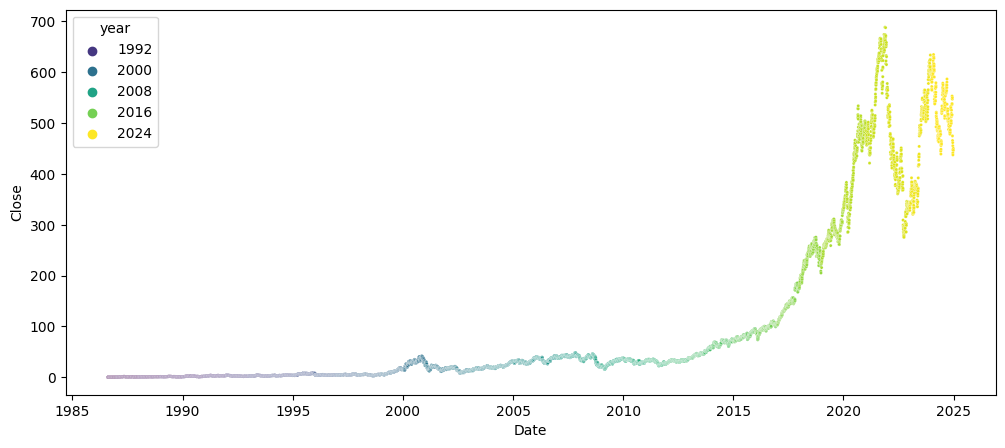

In [3]:
import matplotlib.pyplot as plt

from seaborn import scatterplot

FIGSIZE=(12, 5)
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Close', hue='year')


We probably need to use a log plot to see the price volatility in the early years.

<Axes: xlabel='Date', ylabel='Close'>

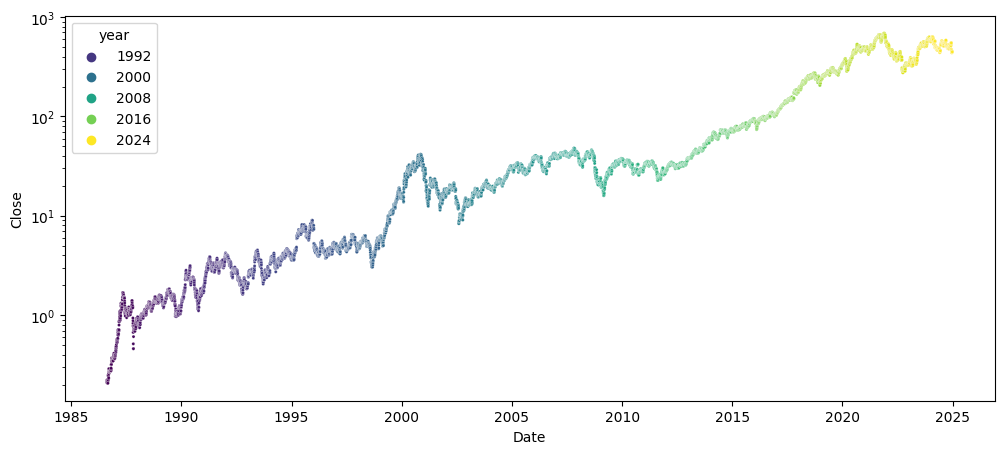

In [4]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Date', y='Close', hue='year')

From this perspective the stock looks like it mostly marched steadily upward for forty years, which would be an oversimplification.

Let's look at the relationship between the price and volume.

<Axes: xlabel='Close', ylabel='Volume'>

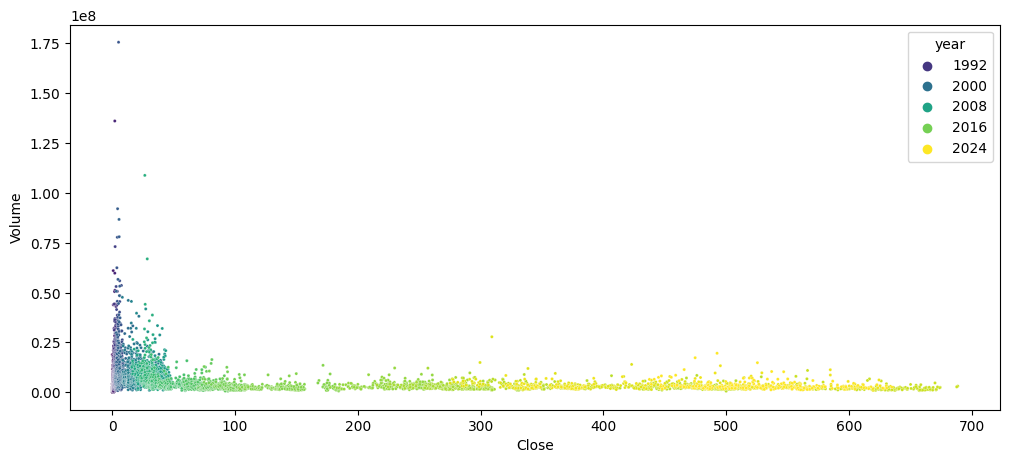

In [5]:
plt.figure(figsize=FIGSIZE)
scatterplot(palette='viridis', s=5, data=df, x='Close', y='Volume', hue='year')

The volume figures are dominated by some outliers; if we use a lot plot maybe an overall trend will be easier to see.

<Axes: xlabel='Close', ylabel='Volume'>

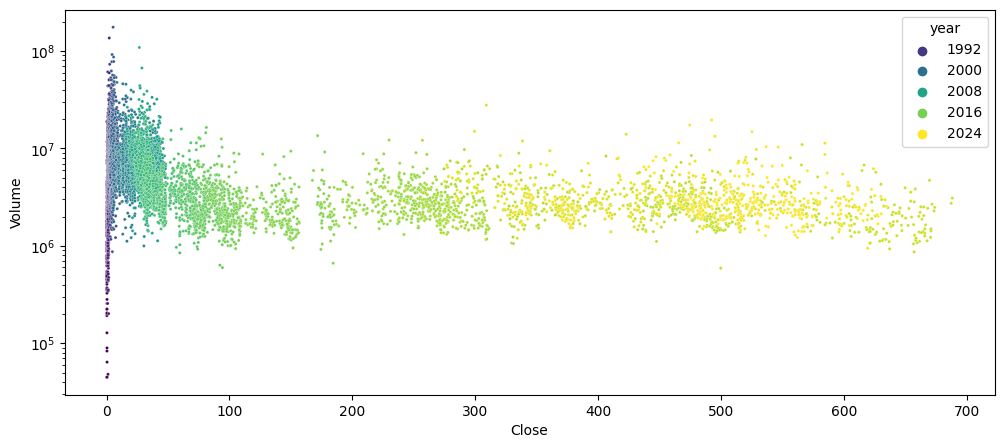

In [6]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df, x='Close', y='Volume', hue='year')

Actually it looks like the daily trading volume is pretty stable once prices reached about 50 USD.

<Axes: xlabel='Close', ylabel='Volume'>

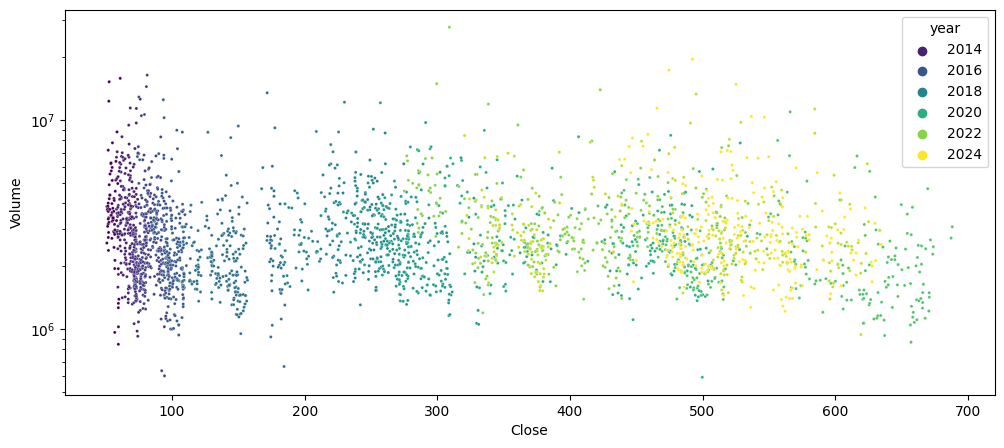

In [7]:
plt.figure(figsize=FIGSIZE)
plt.yscale(value='log')
scatterplot(palette='viridis', s=5, data=df[df['Close'] > 50], x='Close', y='Volume', hue='year')

Let's take another look at the price/volume correlations.

In [8]:
df[['Close', 'Volume']][df['Close'] > 50].corr()

,Close,Volume
Close,1.000000,-0.036864
Volume,-0.036864,1.000000


It turns out since the price reached 50 USD the price and volume have been essentially uncorrelated. Go figure.